In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from mpl_toolkits.mplot3d.axes3d import Axes3D # allows 3D plots
%matplotlib inline
from IPython.display import Image       # only for embedding images
%matplotlib notebook


# Hauptkomponentenanalyse *PCA*

### Ziele:
- Wichtigste Information aus Daten extrahieren
- Unwichtige Daten verwerfen
- Beschreibung der Daten vereinfachen
- Struktur in den Daten erkennen

## Übersicht
- Kovarianz-Matrix
    - Singularwertzerlegung *SVD*
    - Eigenwerte und Eigenvektoren
- Hauptkomponenten
    - Projektion
    - Unterräume
    - kumulierte Varianz
- Beispiele
    - Säugetiere II
    - Bilder
    - Bildanalyse
- Python: `sklearn.PCA`    

# Maximale Varianz?

## Kovarianzmatrix

$$C_{ik} = \frac{1}{m}\sum_{j=1}^m (v_{ij}-\overline{v}_i)(v_{kj}-\overline{v}_k) = \frac{1}{m}\sum_{j=1}^m a_{ij}a_{kj}$$
mit den zentrierten Daten
$$\mathbf{A} := \mathbf{V}-\overline{\mathbf{v}}$$

ergibt sich
$$\mathbf{C} = \frac{1}{m}\mathbf{AA}^T$$

## Projektion

Projektion aller Daten $\mathbf{v}$ auf beliebige Richtung $\mathbf{w}$ ergibt

<img src="images/pca_projection_vb.png" width="25%">

$$\qquad\mathcal{E}(\mathbf{w}\cdot\mathbf{v}) = \frac{1}{m}\sum_{j=1}^m \mathbf{w}\cdot\mathbf{v}_j
=\mathbf{w}\cdot\sum_{j=1}^m \frac{1}{m}\mathbf{v}_j = \mathbf{w}\cdot\overline{\mathbf{v}}$$

$$\begin{align}
\mathrm{Var}(\mathbf{w}\cdot\mathbf{v}) &= \frac{1}{m}\sum_{j=1}^m (\mathbf{w}\cdot\mathbf{v}_j - \mathbf{w}\cdot\overline{\mathbf{v}})^2 =\frac{1}{m}\sum_{j=1}^m (\mathbf{w}\cdot(\mathbf{v}_j - \overline{\mathbf{v}}))^2 \\
&=\frac{1}{m}\sum_{j=1}^m (\mathbf{w}\cdot \mathbf{a}_j)^2 =\frac{1}{m}\sum_{j=1}^m\sum_{i=1}^n\sum_{k=1}^n w_ia_{ij}a_{kj}w_k \\
&=\frac{1}{m}\mathbf{w}\cdot\mathbf{A}\mathbf{A}^T\mathbf{w} = \mathbf{w}\cdot\mathbf{C}\mathbf{w}
\end{align}$$

# Singularwertzerlegung, singular value decomposition *SVD *  I

Daten $m\times n$ (hier im Bsp. Tiere $\times$ Variablen)

Unterraum $\mathbf{K}$ < $\mathbf{M}$ mit Hauptkomponenten $i\in [1\dots K]$. Meist $\;K\ll n$.

- sortiert nach Größe der Eigenwerte (Relevanz zur Varianz)
- gedreht in Orthonormalsystem (lineare Unabhängigkeit)

Quelle: Prof. V. Blanz, Uni Siegen


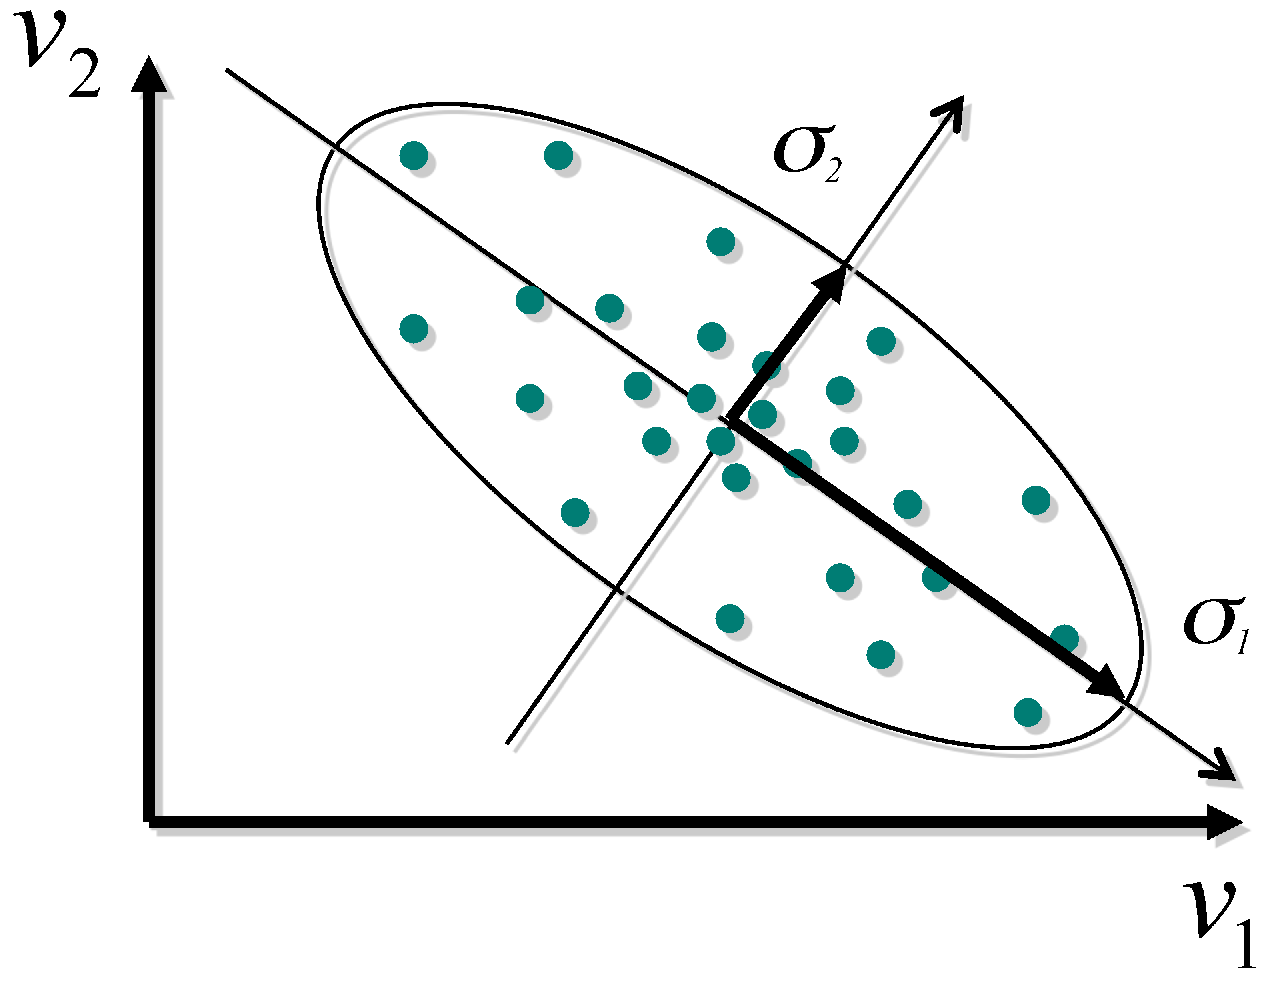

# Zusammenfassung II

- Kovarianzmatrix $\mathbf{C}$ aus Datenmatrix $\mathbf{A}$ bestimmen
$$\mathbf{C} = \frac{1}{m}\mathbf{AA}^T$$
- Diagonalisieren
$$\mathbf{C}=\mathbf{U}\mathbf{\Lambda}\mathbf{U}^T$$
- Sortiere Eigenvektoren $\mathbf{u}_i$ der Größe der Eigenwerte $\lambda_i$ nach
$$\lambda_{(1)}\geq\lambda_{(2)}\geq\dots$$
- Erste Eigenvektoren spannen Unterraum $\mathbf{U}'$ mit jeweils größtmöglicher Varianz auf
- Hauptkomponenten aus Projektion in  $\mathbf{U}'$
$$\boldsymbol\alpha = \mathbf{U' a}$$
- Abschneiden nach Unterschreiten einer Schwelle für Eigenwerte

# Bilder als Vektoren

Bildvektor $\mathbf{v} = (v_1, v_2, \dots, v_n)^T \in \mathbb{R}^n$ Pixel für Pixel in einer langen Zeile $1\dots n$.

Mehrere $m$ Bilder $\mathbf{v}_j$.

Damit Bilderdatenbank
- $m\times n$ Daten-Array, zB. ($m=20$ Bilder) $\;\times\;$ ($n=256\cdot 256\;=64K\;$ Pixel) 
- $= 1280K$ Werte $v_{ij}$

vn:9,
v.shape:(9, 30)

0
1
2
3
4
5
6
7
8
9


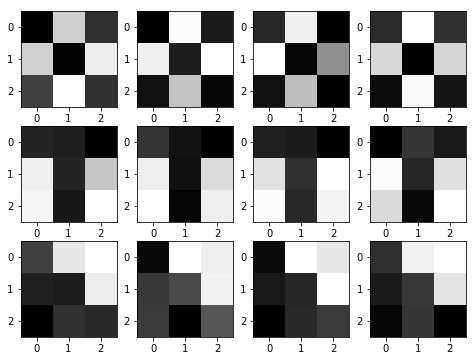

In [45]:
'''Example images 3x3'''
np.random.seed(987654)
vshape = (3, 3)                # a 3x3 pixel image
vn = vshape[0]*vshape[1]       # total number of pixels
v = np.zeros((vn, 30))         # reserve space for 3x10 images a 3x3
print('vn:{},\nv.shape:{}\n'.format(vn, v.shape))
# print('rvs:{}'.format(stats.norm.rvs(size=vn)))
for i in range(0, 10):         # "X"
    v[:, i] = 192-np.array([1, 0, 1, 0, 1, 0, 1, 0, 1])*128+15*stats.norm.rvs(size=vn)
# print('[v]:\n{}'.format(v))
for i in range(10, 20):        # "T"
    v[:, i] = 192-np.array([1, 1, 1, 0, 1, 0, 0, 1, 0])*128+15*stats.norm.rvs(size=vn)
for i in range(20, 30):        # triangle
    v[:, i] = 192-np.array([1, 0, 0, 1, 1, 0, 1, 1, 1])*128+15*stats.norm.rvs(size=vn)

# 设置画布大小
fig = plt.figure(figsize=(8,6))
# enumerate: 创建枚举变量(i:枚举值, j:枚举名)
#  这里主要是为了在画布上排列图片
for i, j in enumerate((1, 2, 3, 4, 11, 12, 13, 14, 21, 22, 23, 24)):
#     print('vshape:{}\tj:{}'.format(vshape, j))
    fig.add_subplot(3, 4, i+1)
    image = v[:,j].reshape(vshape)
#     print(image)
    plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');


## Projektion

Quelle: Prof. V. Blanz, Uni Siegen


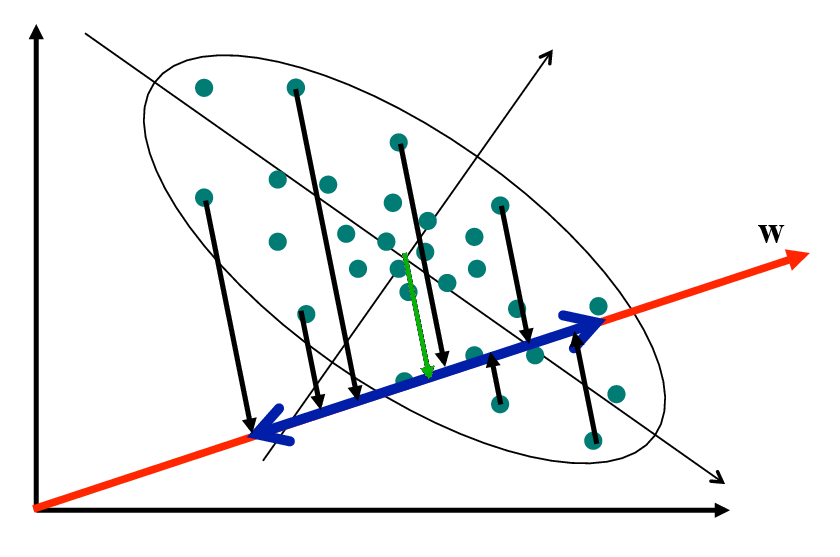

#### Erwartungswert
$\qquad\mathcal{E}(\mathbf{w}\cdot\mathbf{v}) = \mathbf{w}\cdot\overline{\mathbf{v}}$

### Mittelwertsbild
$\overline{\mathbf{v}} = \frac{1}{m}\sum_{j=1}^m \mathbf{v}_j$

vmean:(9,),[ 62.2137364  151.01134318 104.99166009 149.72557991  66.00542349
 187.2638448  106.64430049 106.45348856 107.53507233]
image:(3, 3),[[ 62.2137364  151.01134318 104.99166009]
 [149.72557991  66.00542349 187.2638448 ]
 [106.64430049 106.45348856 107.53507233]]
[ 62.21 151.01 104.99 149.73  66.01 187.26 106.64 106.45 107.54]


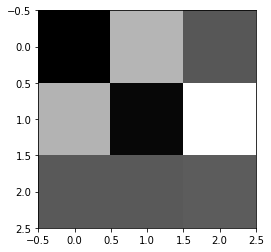

In [42]:
# average image
vshape = (3, 3)                      # define pixelmatrix from vector
vmean = v.mean(axis=1)               # average pixel over images
# print('v:{},{}'.format(v.shape, v))
print('vmean:{},{}'.format(vmean.shape, vmean))
image = vmean.reshape((3, 3))        # break in 3 lines a 3 pixels
print('image:{},{}'.format(image.shape, image))
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');
print(np.round(vmean, decimals=2))


### Differenzbilder "*Karrikaturen*"
$\mathbf{a}_j = \mathbf{v}_j-\mathbf{\bar{v}}$

a ist (9, 30)


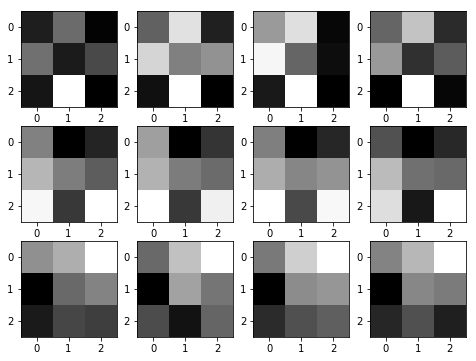

In [50]:
''' burlesque '''
a = (v.T - vmean).T
print('a ist {}'.format(a.shape))
fig = plt.figure(figsize=(8, 6))
for i, j in enumerate([1, 2, 3, 4, 11, 12, 13, 14, 21, 22, 23, 24]):
    fig.add_subplot(3, 4, i+1)
    image = a[:,j].reshape(vshape)
    plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');


### Varianz in einem Pixel $i$
$$\mathrm{Var}_i = \frac{1}{m}\sum_{j=1}^m a_i^2$$

In [51]:
print('variances in each pixel:')
var = a.var(axis=1)       # variance in 2nd dimension = images
print('var ist {}'.format(var.shape))
for i in range(3):        # cycle through the lines
    print(var[3*i:3*i+3]) # one line of image vectors' variance


variances in each pixel:
var ist (9,)
[ 228.22801591 3992.91320336 4121.06958526]
[3636.14357176  187.26547556  211.72698014]
[3626.98370475 3883.00539673 3903.1419721 ]


image ist (3, 3)


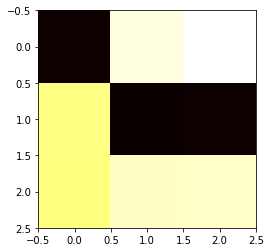

In [52]:
'''variances in each pixel (graphically, black is less, white more)'''
image = var.reshape(vshape)
plt.imshow(image, cmap=plt.cm.hot, interpolation='nearest');
print('image ist {}'.format(image.shape))


### Varianz unter Projektion
$$\mathrm{Var}(\mathbf{w}\cdot\mathbf{v}_j) = \mathbf{w}\cdot\mathbf{C}\mathbf{w} $$

### Kovarianzmatrix
Pixel $i$ vs. Pixel $k$ über alle Bilder $j=1\dots m$

$$C_{ik} = \frac{1}{m}\sum_{j=1}^m (v_{ij}-\overline{v}_i)(v_{kj}-\overline{v}_k) = \frac{1}{m}\sum_{j=1}^m a_{ij}a_{kj}$$

Kann dargestellt werden mittels Datenmatrix $\mathbf{A}$ aus Spalten $\mathbf{a}_i$, so daß

$$\mathbf{C} = \frac{1}{m}\mathbf{AA}^T$$

In [58]:
'''covariance matrix'''
print('data Matrix A has shape {}'.format(a.shape))
C = 1./a.shape[1] * np.dot(a, a.T)
print('covariance matrix C has shape {}'.format(C.shape))
print('cov[0..2][0..8]:')
print(np.round(C, decimals=0))


data Matrix A has shape (9, 30)
covariance matrix C has shape (9, 9)
cov[0..2][0..8]:
[[  228.  -261.  -245.   175.   -50.    22.   256.   -44.   213.]
 [ -261.  3993.  2309. -1574.    93.   -89. -3714.  2065. -3793.]
 [ -245.  2309.  4121. -3730.    78.    19. -2381. -1443. -2058.]
 [  175. -1574. -3730.  3636.   -62.   -28.  1719.  1872.  1417.]
 [  -50.    93.    78.   -62.   187.    39.   -64.   -88.  -132.]
 [   22.   -89.    19.   -28.    39.   212.   104.   -48.   102.]
 [  256. -3714. -2381.  1719.   -64.   104.  3627. -1741.  3615.]
 [  -44.  2065. -1443.  1872.   -88.   -48. -1741.  3883. -2140.]
 [  213. -3793. -2058.  1417.  -132.   102.  3615. -2140.  3903.]]


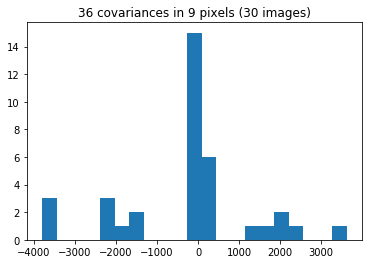

In [59]:
'''distribution of 9x8/2 covariances'''
# mask excludes lower half and diagonal variances
mask = np.zeros_like(C)
for i in range(C.shape[0]):
    mask[i, 1+i:] = 1  # upper next-to-diagonal
# choose according to mask, collect in array instead of matrix
covs = C[mask!=0].flatten()
plt.hist(covs, bins=21)
plt.title('{} covariances in {} pixels ({} images)'
          .format(covs.shape[0], a.shape[0], a.shape[1]));


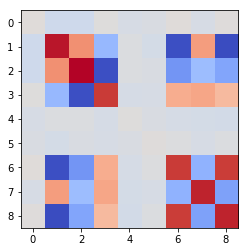

In [60]:
'''visualize (co)variances 9x9 pixel per pixel'''
plt.imshow(C, cmap=plt.cm.coolwarm, interpolation='nearest');


### Aufgabe:
 Finde Unterraum mit größter Varianz

### Lösung:
Diagonalisieren der Kovarianzmatrix $\mathbf{C}$

# Diagonalisieren II

Daten $M = 30$ Bilder $\times\; N = 9$ Pixel.

Unterraum $K$ < $M, N$ mit Hauptkomponenten $i=1\dots K$

Quelle: Prof. V. Blanz, Uni Siegen


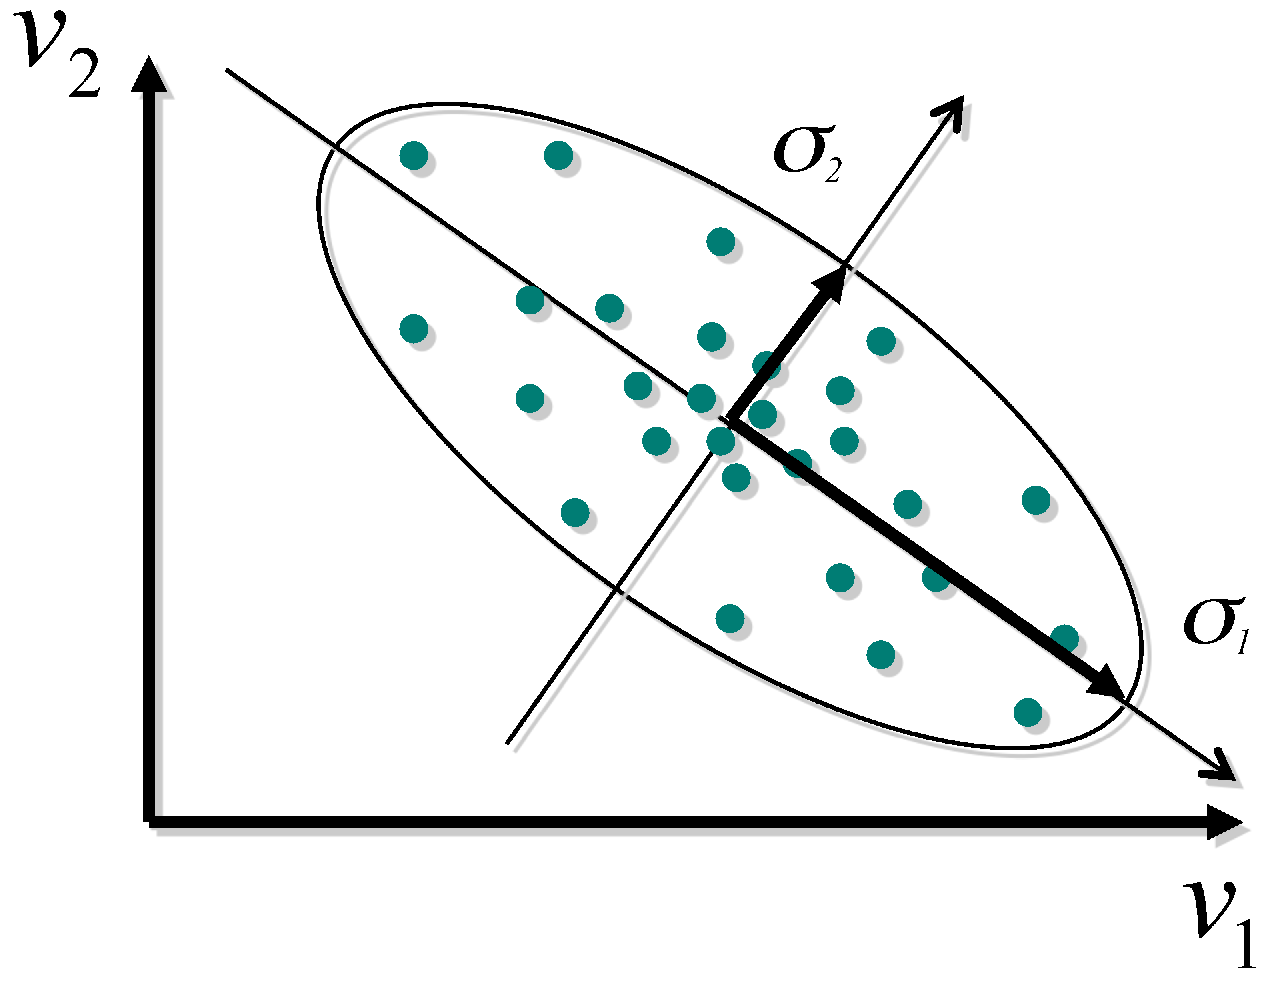

In [67]:
# 计算特征值和特征向量
EW, EV = np.linalg.eig(C)
# help(np.linalg.eig)
print('EW{}:{}\nEV{}:{}'.format(EW.shape, EW, EV.shape, EV))


EW(9,):[14773.69557166  7908.25750149   299.39897934   234.18269795
   245.02491753   145.29559932    35.44659691    62.30624044
    86.86980092]
EV(9, 9):[[-0.03557103 -0.00739096  0.28447138  0.78515056 -0.17687465 -0.45224083
  -0.21001142 -0.10918643 -0.09727187]
 [ 0.49916416 -0.17373076 -0.03753418 -0.20877017  0.0364196  -0.48424365
   0.4223169  -0.19398516 -0.47313725]
 [ 0.39845976  0.46660125  0.19896012 -0.20977495 -0.02816124 -0.17410951
  -0.43523333  0.5536071  -0.11360627]
 [-0.31363364 -0.51559433 -0.26825937 -0.11067758  0.10458605 -0.48537159
  -0.08737874  0.52730853  0.13917851]
 [ 0.01230617  0.00992114 -0.64214148 -0.08861933 -0.39641633 -0.03731746
  -0.52132868 -0.30927829 -0.23146472]
 [-0.00930449  0.0134609   0.17489158 -0.1987089  -0.84560241 -0.1229058
   0.2793902   0.06542789  0.34230247]
 [-0.48253443  0.12118278  0.04838362  0.03460804 -0.21700439  0.1927746
   0.21371131  0.31011335 -0.72307732]
 [ 0.16017965 -0.65611311  0.47499874 -0.15607658 -0.130

In [64]:
'''test if really Eigenvalue / -vectors
   rem: rank of C is not #images but #pixels (usually the other way round...)'''
for i in range(min(v.shape[0], v.shape[1])-1):
    np.testing.assert_allclose(np.dot(C, EV.T[i]), EW[i]*EV.T[i])
# no exception means: they are (very close to) zero


Eigenvalues:
[14774.  7908.   299.   234.   245.   145.    35.    62.    87.]


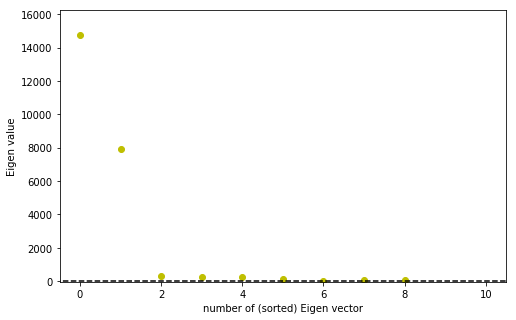

In [63]:
print('Eigenvalues:')
print(np.round(EW, decimals=0))
plt.figure(figsize=(8,5))
plt.plot(EW, 'yo')
plt.plot([-1,12], 2*[0], 'k--')
plt.xlabel('number of (sorted) Eigen vector')
plt.ylabel('Eigen value')
plt.axis((-.5, 10.5, -min(EW), 1.1*max(EW)));


## PCA III
Sortiere Eigenwerte (Varianzen) der Größe nach
$$\sigma_1\geq\sigma_2\geq\dots$$

Dann ist
- $\mathbf{u}_1$ die Richtung größter Variation
- $\mathbf{u}_2$ die Richtung größter Variation im dazu orthogonalen Unterraum
- ...
- $\sigma_m=0\quad$ (nur wenn Daten zentriert: Verlust eines Freiheitsgrades)

## Abschneiden nach $h$ Dimensionen
- Das sind die Hauptkomponenten
- Sie spannen einen Unterraum (Hyperebene) in den Daten auf.
- Beispiel: $h=5$

In [13]:
liste = [(np.abs(EW[i]), EV[:, i]) for i in range(EW.shape[0])]
liste.sort()                                    # Sort Eigenvalues
liste.reverse()                                 # biggest to shortest
h = 5                                           # number of wanted components
U = np.asarray([liste[i][1] for i in range(h)]) # Matrix U of EVs u_i
print('matrix U of first h={} Eigen-vectors has shape {}'.format(h, U.shape))


matrix U of first h=5 Eigen-vectors has shape (5, 9)


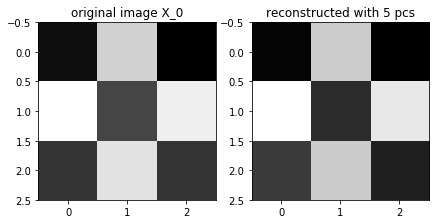

In [14]:
'''compare original image with reconstructed'''
vX0 = v[:,0]                            # choose 1st image (index 0), full vector (:)
aX0 = vX0 - vmean                       # the centralized image "burlesque"
v_0 = vmean.copy()                      # start with the average
for u in U:                             # cycle through the (sorted) Eigenvectors
    v_0 += np.dot(u, aX0) * u           # add up next re-projection of principal component
fig = plt.figure(figsize=(7,4))
fig.add_subplot(1, 2, 1)
image = vX0.reshape(vshape)             # original (3 lines a 3 pixels)
plt.title('original image X_0')
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');
fig.add_subplot(1, 2, 2)
image = v_0.reshape(vshape)             # reconstructed
plt.title('reconstructed with {} pcs'.format(h))
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');


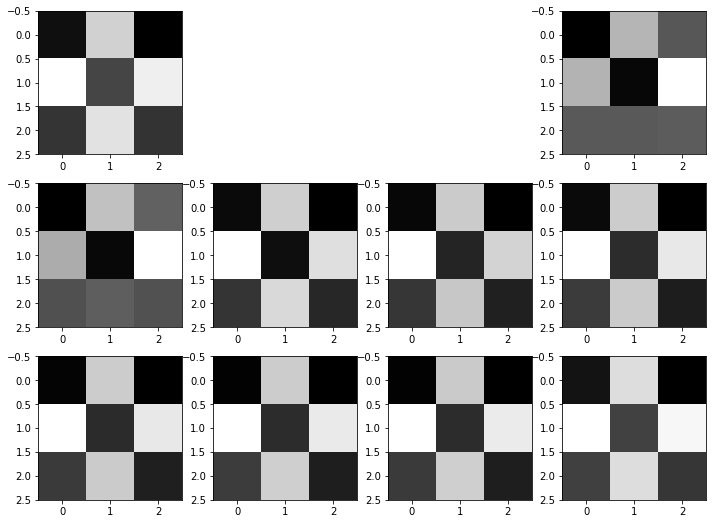

In [15]:
''' show image #0 after 0..8 biggest Eigen values '''
h = 8                              # all components
U = np.asarray([liste[i][1] for i in range(h)])  # Matrix U of h=8 EVs u_i
img = 0                            # image X_0
vX0 = v[:,img]                     # 0 is first of "X"
aX0 = vX0 - vmean                  # the centralized image "burlesque"
image = vX0.reshape(vshape)        # break in 3 lines a 3 pixels
fig = plt.figure(figsize=(12,9))
# a grid of 3 lines with 4 boxes each; use 1st (upper left)
fig.add_subplot(3, 4, 1)
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');
v_0 = vmean.copy()                 # start with the average, make a copy
image = v_0.reshape(vshape)        # show this starting center
fig.add_subplot(3, 4, 4)           # use 4th (upper right)
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');
for i, u in enumerate(U):          # cycle through the (sorted) Eigenvectors
    # add up next re-projection of principal component
    v_0 += np.dot(u, aX0) * u
    fig.add_subplot(3, 4, 5+i)
    image = v_0.reshape(vshape)    # 3 lines a 3 pixels
    plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');


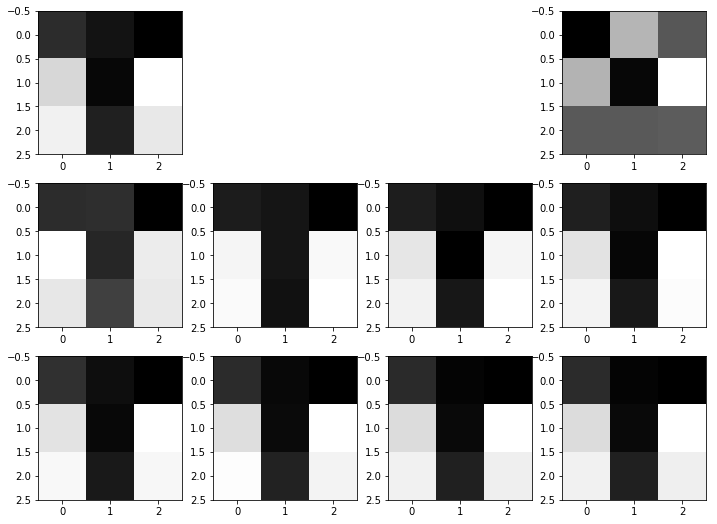

In [16]:
''' show image #10 after 0..8 biggest Eigen values '''
img = 10                           # image T_0
vT0 = v[:,img]                     # 0 is first of "T"
aT0 = vT0 - vmean                  # the centralized image "burlesque"
image = vT0.reshape(vshape)        # break in 3 lines a 3 pixels
fig = plt.figure(figsize=(12,9))
# a grid of 3 lines with 4 boxes each; use 1st (upper left)
fig.add_subplot(3, 4, 1)
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');
v_0 = vmean.copy()                 # start with the average, make a copy
image = v_0.reshape(vshape)        # show this starting center
fig.add_subplot(3, 4, 4)           # use 4th (upper right)
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');
for m, u in enumerate(U):          # cycle through the (sorted) Eigenvectors
    # add up next re-projection of principal component
    v_0 += np.dot(u, aT0) * u
    fig.add_subplot(3, 4, 5+m)
    image = v_0.reshape(vshape)    # 3 lines a 3 pixels
    plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');


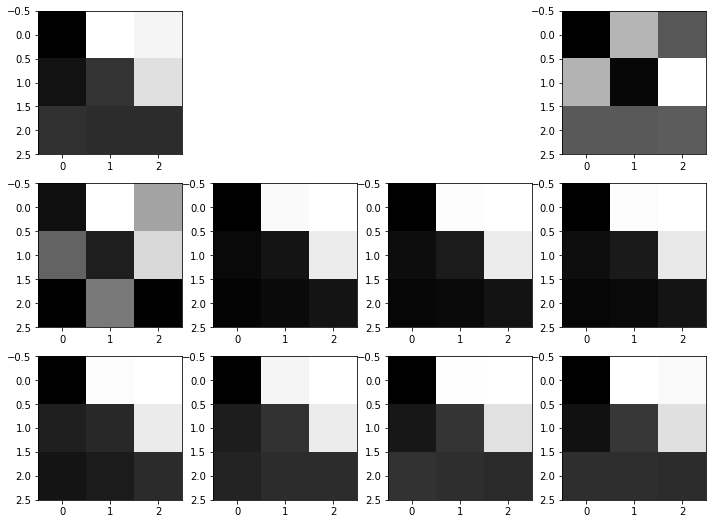

In [17]:
''' show image #20 after 0..8 biggest Eigen values '''
img = 20                           # image D_0
vD0 = v[:,img]                     # 20 is first of "D"
aD0 = vD0 - vmean                  # the centralized image "burlesque"
image = vD0.reshape(vshape)        # break in 3 lines a 3 pixels
fig = plt.figure(figsize=(12,9))
# a grid of 3 lines with 4 boxes each; use 1st (upper left)
fig.add_subplot(3, 4, 1)
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');
v_0 = vmean.copy()                 # start with the average, make a copy
image = v_0.reshape(vshape)        # show this starting center
fig.add_subplot(3, 4, 4)           # use 4th (upper right)
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');
for m, u in enumerate(U):          # cycle through the (sorted) Eigenvectors
    # add up next re-projection of principal component
    v_0 += np.dot(u, aD0) * u
    fig.add_subplot(3, 4, 5+m)
    image = v_0.reshape(vshape)    # 3 lines a 3 pixels
    plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');


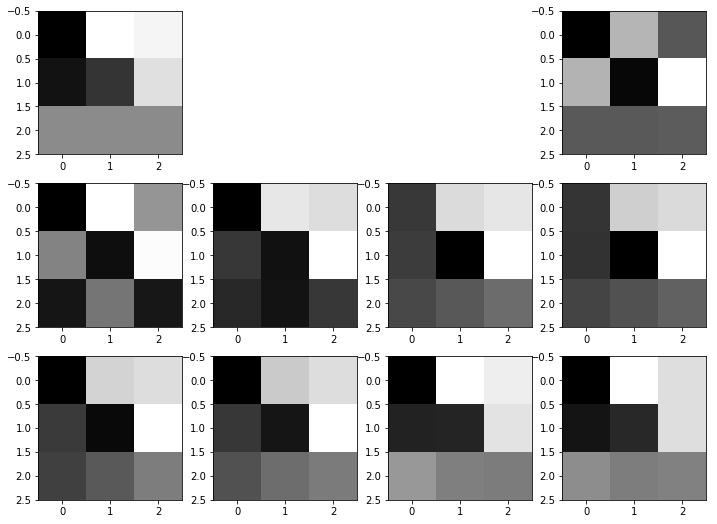

In [18]:
''' try reconstructing from a distortion '''
img = 20                           # image D_0
vQ0 = v[:,img]                     # again 20 is first of "D"
vQ0[6:] = 128                      # ---> heavily distort last line <---
aQ0 = vQ0 - vmean                  # this one centralized as "burlesque"
image = vD0.reshape(vshape)        # break in 3 lines a 3 pixels
fig = plt.figure(figsize=(12,9))
# a grid of 3 lines with 4 boxes each; use 1st (upper left)
fig.add_subplot(3, 4, 1)
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');
v_0 = vmean.copy()                 # start with the average, make a copy
image = v_0.reshape(vshape)        # show this starting center
fig.add_subplot(3, 4, 4)           # use 4th (upper right)
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');
for m, u in enumerate(U):          # cycle through the (sorted) Eigenvectors
    v_0 += np.dot(u, aQ0) * u      # add up next re-projection of principal component
    fig.add_subplot(3, 4, 5+m)
    image = v_0.reshape(vshape)    # 3 lines a 3 pixels
    plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');


## Ergebnis Rekonstruktion
- Aus den wichtigen Hauptkomponenten lassen sich die Bilder wieder herstellen


# Komponenten
Projektion auf Unterraum aus Hauptkomponentenvektoren $\mathbf{u}_i$:
$$\boldsymbol\alpha = \mathbf{U}'\mathbf{a}$$

- Gewichtung der Hauptkomponenten(vektoren) im Bild $\mathbf{a}$
- Koordinaten des Bildes im Unterraum $U'$
- Dimension $h$

In [19]:
'''define supb space of first h=5 principal components'''
h = 5           # restrict sub space to 5 principal components
Uprime = U[:h]  # select first vectors spanning the sub space
print(np.round(Uprime, decimals=2))


[[-0.04  0.5   0.4  -0.31  0.01 -0.01 -0.48  0.16 -0.48]
 [-0.01 -0.17  0.47 -0.52  0.01  0.01  0.12 -0.66  0.2 ]
 [ 0.28 -0.04  0.2  -0.27 -0.64  0.17  0.05  0.47  0.37]
 [-0.18  0.04 -0.03  0.1  -0.4  -0.85 -0.22 -0.13  0.14]
 [ 0.79 -0.21 -0.21 -0.11 -0.09 -0.2   0.03 -0.16 -0.46]]


In [20]:
'''project an example image a onto sub space U-prime'''
ao = v[:, 0] - vmean                  # a in original variable space 
alpha = U.dot(ao)                     # transformed a in u_i  i=0..4
print('Projection of image v[0] onto {}-dim sub space U has components\n{}'
      .format(Uprime.shape[0], np.round(alpha, decimals=2)))


Projection of image v[0] onto 5-dim sub space U has components
[  11.15 -113.02  -16.43  -12.55   -3.84    3.21    1.66  -15.14]


In [21]:
'''transform all n=30 images into sub space U'''
# strange 2x transposed because of subtracting mean
Alpha = Uprime.dot((v.T-vmean).T)
print('All images projected onto PCs: Alpha, which has shape {}'.format(Alpha.shape))


All images projected onto PCs: Alpha, which has shape (5, 30)


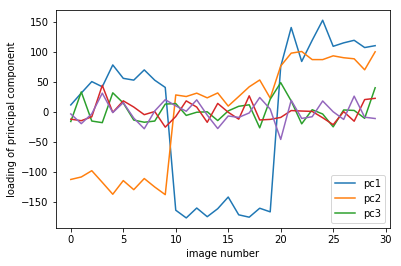

In [22]:
'''amount of components depends on image'''
plt.plot(Alpha.T, ls='-')
plt.xlabel('image number')
plt.ylabel('loading of principal component')
plt.legend(['pc1', 'pc2', 'pc3'], loc='lower right');


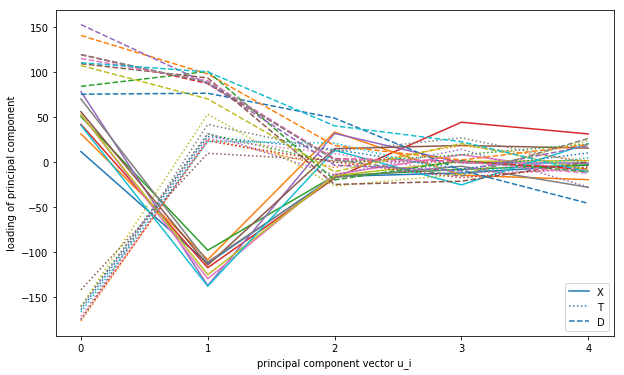

In [23]:
'''show distribution of components within images'''
plt.figure(figsize=(10,6))
plt.plot(Alpha[:, 0:10], ls='-',  label='X')     # the Xs
plt.plot(Alpha[:,10:20], ls=':',  label='T')     # the Ts
plt.plot(Alpha[:,20:30], ls='--', label='D')     # the Ds
plt.xlabel('principal component vector u_i')
plt.ylabel('loading of principal component')
plt.xticks([0, 1, 2, 3, 4])
# fetch axes object and legend entries therein
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[::10]     # only every 10th 
labels = labels[::10]
plt.legend(handles, labels, loc='lower right');


# Separation

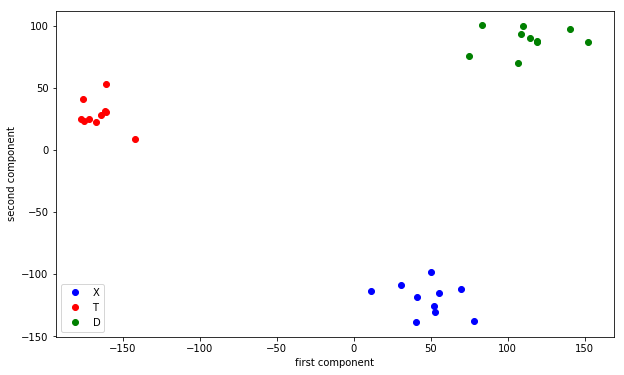

In [24]:
'''separation according to loading of first two principal components'''
plt.figure(figsize=(10,6))
plt.plot(Alpha[0, 0:10], Alpha[1, 0:10], 'bo', label='X')
plt.plot(Alpha[0,10:20], Alpha[1,10:20], 'ro', label='T')
plt.plot(Alpha[0,20:30], Alpha[1,20:30], 'go', label='D')
plt.xlabel('first component')
plt.ylabel('second component')
plt.legend(loc='lower left');


# Interpretation

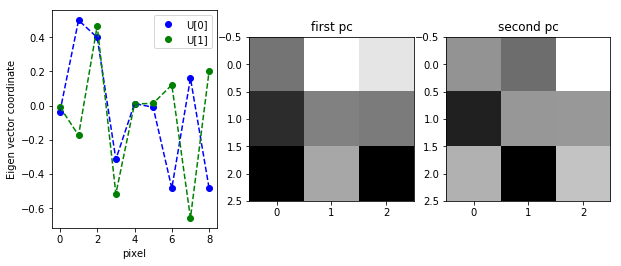

In [25]:
'''interpretation of first two Eigenvectors'''
fig = plt.figure(figsize=(10,4))
fig.add_subplot(131)
plt.plot(U[0], 'bo', label='U[0]')
plt.plot(U[1], 'go', label='U[1]')
plt.plot(U[0], 'b--')
plt.plot(U[1], 'g--')
plt.xlabel('pixel')
plt.ylabel('Eigen vector coordinate')
plt.legend();
fig.add_subplot(132)
#image = (vmean+np.sqrt(EW[0])*U[0]).reshape(vshape)   # U0 as an image
image = np.sqrt(EW[0])*U[0].reshape(vshape)   # U0 as an image
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest');
plt.title('first pc')
fig.add_subplot(133)
#image = (vmean+np.sqrt(EW[1])*U[1]).reshape(vshape)   # U1 as an image
image = np.sqrt(EW[1])*U[1].reshape(vshape)   # U1 as an image
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
plt.title('second pc');


# PCA-Ergebnisse
im Unterraum der Hauptkomponenten

Für $\mathbf{v} = \overline{\mathbf{v}}+\sum_{i=1}^{m-1}\alpha_i\mathbf{u}_i$ gilt
$$\begin{align}
\mathcal{E} (\alpha_i)  &= 0 \\
\mathrm{Var}(\alpha_i)          &= \sigma_i^2 \\
\mathrm{Cov}(\alpha_i,\alpha_j) &= 0 \qquad i\!\neq\!j
\end{align}$$

In [26]:
'''statistics on Alpha'''
print('Alpha expectation values {}'.format(np.round(Alpha.mean(axis=1), decimals=12)))
print('Alpha variances {}'.format(np.round(Alpha.var(axis=1), decimals=1)))
print('Alpha covariance matrix:\n{}'.format(np.round(np.cov(Alpha), decimals=1)))


Alpha expectation values [-1.54762589 -0.66388278  1.74899842 -0.39254781 -1.14511962]
Alpha variances [14467.5  7793.7   373.7   247.8   299.7]
Alpha covariance matrix:
[[14966.4  -206.1   145.    -34.4   -71.4]
 [ -206.1  8062.4   141.5   -32.6   -82.6]
 [  145.    141.5   386.5   -15.1   -76.9]
 [  -34.4   -32.6   -15.1   256.4    15.9]
 [  -71.4   -82.6   -76.9    15.9   310. ]]


# Anwendung Whitening

Quelle: Prof. V. Blanz, Uni Siegen


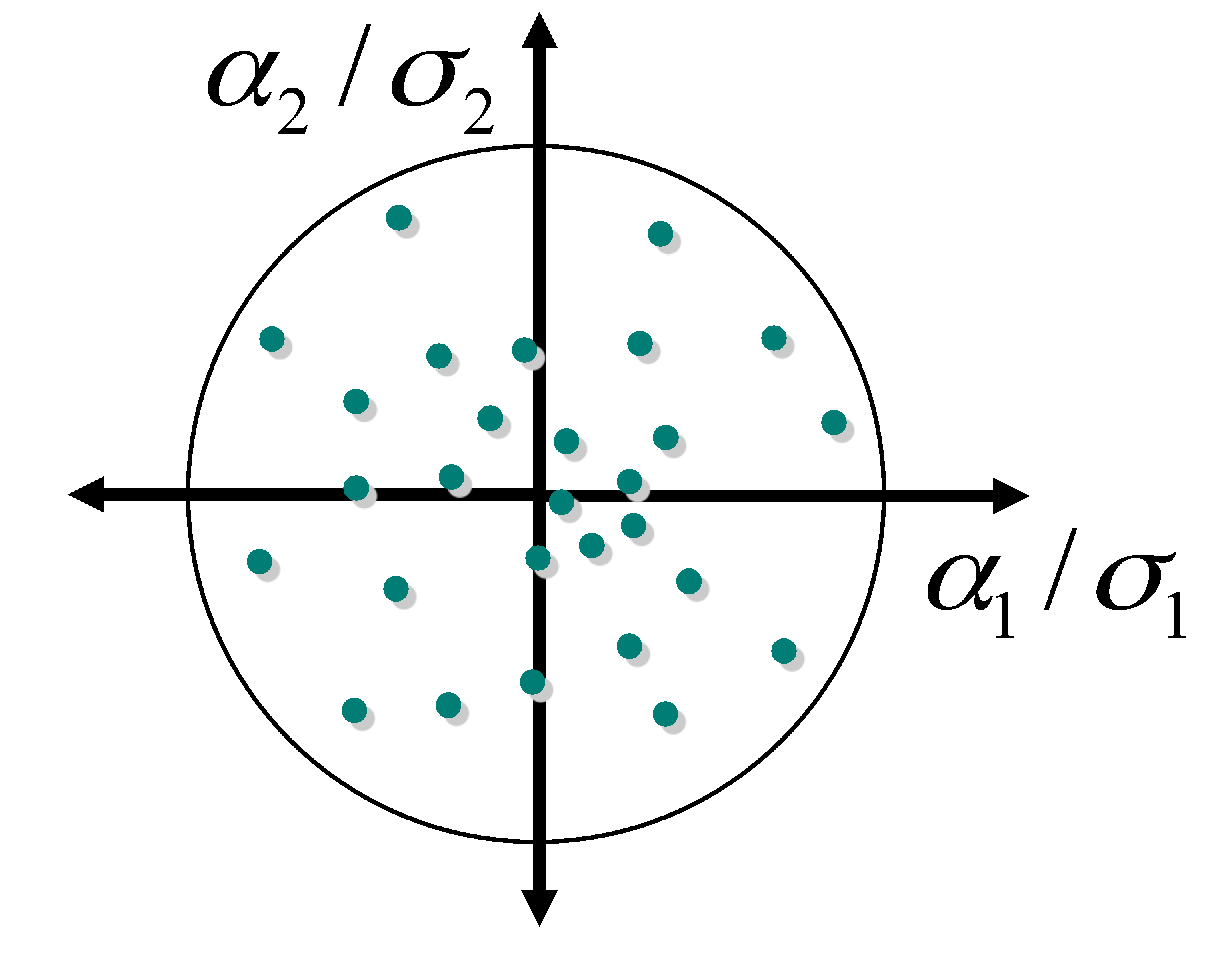

#### Momente
- Nulltes Moment = 1 (Normierte Wahrscheinlichkeitsdichte) 
- Erstes Moment = 0 (Erwartungswert)
- Zweites Moment = 1 (Varianz)

## Korrelationskoeffizient
Anstatt der Kovarianz wird die **Korrelation** verwendet

$\Rightarrow$ Skalierungsinvariantes Problem

$\Rightarrow$ SVD *de-korreliert*

# SVD singular value decomposition III
### SVD auf $\mathbf{C}$ anwenden
- Hohe Dimension n
- Eigenwerte sind sehr unterschiedlich
- Rang der Matrix ist $< min(m,n)$

## $\Rightarrow$ SVD auf $\mathbf{A}$ anwenden
$\mathbf{A} = \mathbf{UWV}^T$

$\mathbf{C}=\frac{1}{m}\mathbf{AA}^T=\frac{1}{m}\mathbf{UWV}^T\mathbf{VWU}^T=\frac{1}{m}\mathbf{UW}^2\mathbf{U}^T $

Dann sind die Spalten von $\mathbf{U}$ Eigenvektoren $\mathbf{u_i}$

und $\sigma_i=\frac{1}{\sqrt{m}}w_i$

Für eine symmetrische Matrix sind die Eigenvektoren orthogonal
$$\mathbf{u}_i\cdot\mathbf{u}_j=0\quad\forall\;i\!\neq\!j$$
$$|\mathbf{u}_i| = 1\qquad$$

Sortiere Eigenwerte (Varianzen) der Größe nach
$$\sigma_1\geq\sigma_2\geq\dots$$

Dann ist
- $\mathbf{u}_1$ die Richtung größter Variation
- $\mathbf{u}_2$ die Richtung größter Variation im dazu orthogonalen Unterraum
- ...
- $\sigma_m=0$ (nur wenn Daten zentriert: Verlust eines Freiheitsgrades)

## Abschneiden nach $h$ Dimensionen

Hauptkomponenten spannen einen Unterraum (Hyperebene) in den Daten auf.

$$\mathbf{v} = \overline{\mathbf{v}}+\sum_{i=1}^{h}\alpha_i\mathbf{u}_i $$
mit $h$ < $m-1$

mit den Projektionen
$$\alpha_i = \mathbf{u_i}\cdot\mathbf{a} = \mathbf{u_i}\cdot(\mathbf{v}-\overline{\mathbf{v}}) $$

# Kumulierte Varianz

$$\sigma_{\text{accumulated}}^2 = Var(|\mathbf{v}-\overline{\mathbf{v}}|^2)= \sum_{i=1}^{h}\sigma_i^2$$

Optimum!

# *sklearn* PCA

**S**cipy tool**k**it for machine **learn**ing<br>
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

#### Lizenz
- BSD license

#### Installation
    pip install -U scikit-learn
    conda install scikit-learn

#### Einbinden
    from sklearn.decomposition import PCA

#### Version
- derzeit (Feb 2018): scikit-learn version 0.19.0 


#### Methoden

    fit(X[, y])           Fit the model with X.
    fit_transform(X[, y]) Fit the model with X and apply the dimensionality reduction on X.
    get_covariance()      Compute data covariance with the generative model.
    get_params([deep])    Get parameters for this estimator.
    get_precision()       Compute data precision matrix with the generative model.
    inverse_transform(X)  Transform data back to its original space, i.e.,
    score(X[, y])         Return the average log-likelihood of all samples
    score_samples(X)      Return the log-likelihood of each sample
    set_params(**params)  Set the parameters of this estimator.
    transform(X)          Apply the dimensionality reduction on X.
    
#### Daten
Dimension so wählen, wie sie co-variieren sollen

    Parameters: X: array-like, shape (n_samples, n_features)

> http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit


In [27]:
'''the pca from sklearn on the same data v (images) as before'''
from sklearn.decomposition import PCA


In [28]:
X =  np.array(v.T)          # only optional: -vmean
pca = PCA(n_components=6)   # set up the frame; limit number of components
pca.fit(v.T)                # perform the fit to the data
print('variance explained: {}'
      .format(np.round(pca.explained_variance_ratio_, decimals=4)))


variance explained: [0.6112 0.3291 0.0218 0.011  0.0103 0.0069]


(30, 6)


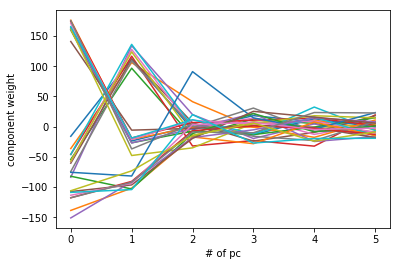

In [29]:
'''show the weights of all 30 images of calculated first 6 pca components'''
x1 = pca.transform(v.T)  # project data into PC-space
print(x1.shape)      # get 30 images times 6 components
plt.plot(x1.T)  # the 6 components weights on x axis, the 30 image on y axis 
plt.xlabel('# of pc') 
plt.ylabel('component weight');


### "gestörtes" Bild

shape of input image is (9,), pca wants it to be (1, 9)


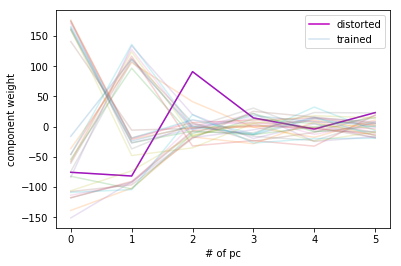

In [30]:
'''make a prediction of "error" image'''
x2 = pca.transform(vQ0.reshape(1, -1)) 
print('shape of input image is {}, pca wants it to be {}'
      .format(vQ0.shape, vQ0.reshape(1, -1).shape))
plt.plot(x2.T, 'm-', label='distorted')   
plt.plot(x1.T, alpha=.2, label='trained') 
plt.xlabel('# of pc') 
plt.ylabel('component weight')
plt.legend(['distorted', 'trained'], loc='upper right');


### Durchschnitts-Bild

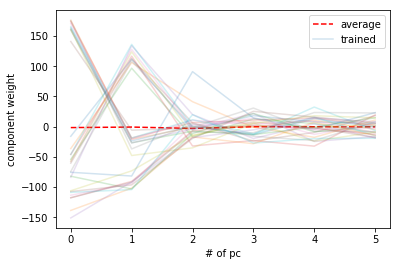

In [31]:
'''make a prediction of "average" image'''
# which principal components for the average image?
x2 = pca.transform(vmean.reshape(1, -1))
plt.plot(x2.T, 'r--', label='average')   
plt.plot(x1.T, alpha=.2, label='trained') 
plt.xlabel('# of pc') 
plt.ylabel('component weight')
plt.legend(['average', 'trained'], loc='upper right');


## Formalitäten

#### Daten übergeben

    DeprecationWarning: Passing 1d arrays as data is 
    deprecated in 0.17 and will raise ValueError in 0.19. 
    Reshape your data either using X.reshape(-1, 1) if your data has a single feature 
    or X.reshape(1, -1) if it contains a single sample.

# Literatur
#### Bücher, Kapitel
- Hyvärinen, Hurri, Hoyer: Natural Image Statistics - A Probabilistic Approach to Early Computational Vision. Springer 2009
- [Abdi, Williams: Principal component analysis. Wiley 2010](http://onlinelibrary.wiley.com/doi/10.1002/wics.101/abstract)

#### Python
- scipy/numpy Vektoroperationen: [http://www.scipy-lectures.org/intro/numpy/operations.html]
- Matrixoperationen numpy, R, Matlab & Julia: [https://sebastianraschka.com/blog/2014/matrix_cheatsheet_table.html]
- matplotlib 3D Plot [https://matplotlib.org/mpl_toolkits/mplot3d/index.html]

# Zusammenfassung PCA
- Lineare Algebra
- Nicht-parametrische Methode
- Datenreduktion
- Erhaltung maximaler Varianz
- Separation
    - Klassifizierung
    - Analyse
- Rekonstruktion
    - auch unvollständiger Daten
    - verrauschter Daten
- Whitening

### Prinzip
- Suche maximale Varianz "*Musik*" in Daten
- Kovarianzmatrix $\mathbf{C}$
- Diagonalisieren
- Eigenwerte $\lambda_i$
    - Varianz in Richtung des Eigenvektors
    - sortieren
    - abschneiden
- Eigenvektoren $\mathbf{u_i}$
    - *Hauptkomponenten*
- Unterräume mit Eigenvektoren
    - Raum maximaler Varianz
    - Rücktransformation
- Komponentenanalyse
- Rücktransformation

### Grenzen von PCA 
- Faktoren
    - $\rightarrow$ Korrelationen
- dekorreliert
    - nicht unabhängig